In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator                 # Import ImageDatagenerator from tensorflow

In [2]:
# Reading data from the folder
path = "Images/"
print(list(os.listdir(path)))                                                       # Classes 

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [3]:
for cls in os.listdir(path):
    print(len(os.listdir(os.path.join(path,cls))))                  # Number of images in the training folder

691
922
836
672
797
952
742
937


In [5]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,                              # Data augmentation on training images
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(path,batch_size = 20,
                                                   target_size = (150,150))

validation_datagen = ImageDataGenerator(rescale = 1.0/255.0,                         # Data augmentation on validation images
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

val_path = "Val_images"
validation_generator = validation_datagen.flow_from_directory(val_path, batch_size = 20, 
                                                              target_size = (150,150))

Found 6549 images belonging to 8 classes.
Found 350 images belonging to 8 classes.


In [6]:
# Model architecture

#Input layer
input_layer = layers.Input(shape=(150,150,3),name='Input_Layer')

#Conv Layer
Conv1 = layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')(input_layer)
#MaxPool Layer
Pool1 = layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool1')(Conv1)


Conv2 = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=3),name='Conv2')(Pool1)
Conv3 = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=5),name='Conv3')(Conv2)
#MaxPool Layer
Pool2 = layers.MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid',data_format='channels_last',name='Pool2')(Conv3)


Conv4 = layers.Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='Conv4')(Pool2)
#MaxPool Layer
Pool3 = layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool3')(Conv4)



#Flatten
flatten = layers.Flatten(data_format='channels_last',name='Flatten')(Pool3)

#FC layer
FC1 = layers.Dense(units=256,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')(flatten)

#FC layer
FC2 = layers.Dense(units=128,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=33),name='FC2')(FC1)

#output layer
Out = layers.Dense(units=8,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(FC2)

#Creating a model
model = Model(inputs=input_layer,outputs=Out)



In [8]:
# Compiling the mmodel before training

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])  

In [9]:
history = model.fit_generator(train_generator,validation_data=validation_generator,epochs = 30, verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 328 steps, validate for 18 steps
Epoch 1/30
328/328 [==============================] - 39s 117ms/step - loss: 1.1031 - accuracy: 0.5931 - val_loss: 0.6895 - val_accuracy: 0.7200
Epoch 2/30
328/328 [==============================] - 37s 114ms/step - loss: 0.6577 - accuracy: 0.7574 - val_loss: 0.5368 - val_accuracy: 0.8114
Epoch 3/30
328/328 [==============================] - 38s 115ms/step - loss: 0.5463 - accuracy: 0.7965 - val_loss: 0.4295 - val_accuracy: 0.8514
Epoch 4/30
328/328 [==============================] - 38s 115ms/step - loss: 0.4814 - accuracy: 0.8270 - val_loss: 0.4504 - val_accuracy: 0.8229
Epoch 5/30
328/328 [==============================] - 38s 116ms/step - loss: 0.4371 - accuracy: 0.8381 - val_loss: 0.3899 - val_accuracy: 0.8571
Epoch 6/30
328/328 [==============================] - 38s 116ms/step - loss: 0.3927 - accuracy: 0.8559 - v

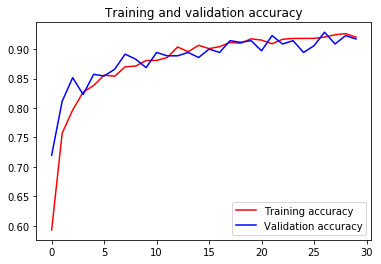

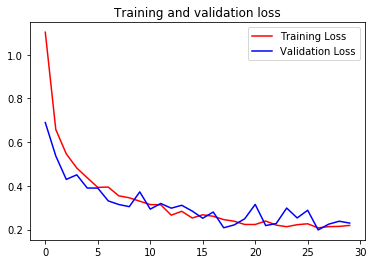

In [13]:
# Plotting the results of training

acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Test the model 
# Using single image

samp_path = "Test/cat_0041.jpg"
img = image.load_img(samp_path,target_size = (150,150))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)


images = np.vstack([x])
classes = model.predict(images)
print(classes)

In [22]:
# Keep all the images in a folder 
# For testing we are only rescaling the images 

test_datagen = ImageDataGenerator(rescale=1.0/255.)
test_gen = test_datagen.flow_from_directory("New_test",
                                           target_size = (150,150))
prediction = model.predict(test_gen)

Found 9 images belonging to 1 classes.


In [24]:
predicted_class_indices = [np.argmax(pred,axis=0) for pred in prediction]

In [26]:
labels = (train_generator.class_indices)                           # Classes used during training
labels

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [27]:
labels = dict((v,k) for k,v in labels.items())                             # Converting classes into key value pairs
predict = [labels[k] for k in predicted_class_indices]                     # Get the predictions using the labels dictionary